In [ ]:
# default_exp space_clustering

# Diferent clustering methods for spatial data

> Diferent clustering methods for spatial data

In [ ]:
#hide
from nbdev.showdoc import *

### MeanShift

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=60000, centers=centers, cluster_std=0.6)

In [ ]:
X.shape, X

((60000, 2),
 array([[ 1.19957726,  1.13094037],
        [-1.11365716, -2.56431276],
        [-1.10611655, -0.45558829],
        ...,
        [ 1.01367638,  1.54773387],
        [-1.4012213 , -0.99219442],
        [-0.88836584, -1.33994179]]))

In [ ]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
bandwidth

1.0237498469238382

In [ ]:
# Compute clustering with MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


In [ ]:
cluster_centers

array([[ 0.92926946, -0.92318283],
       [ 0.99509878,  0.92338456],
       [-0.90341301, -0.99368369]])

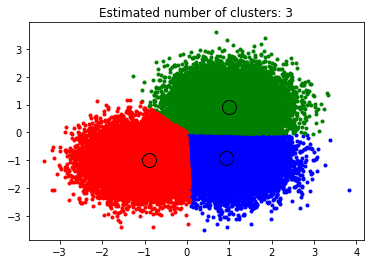

In [ ]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Next time need to test this:
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py